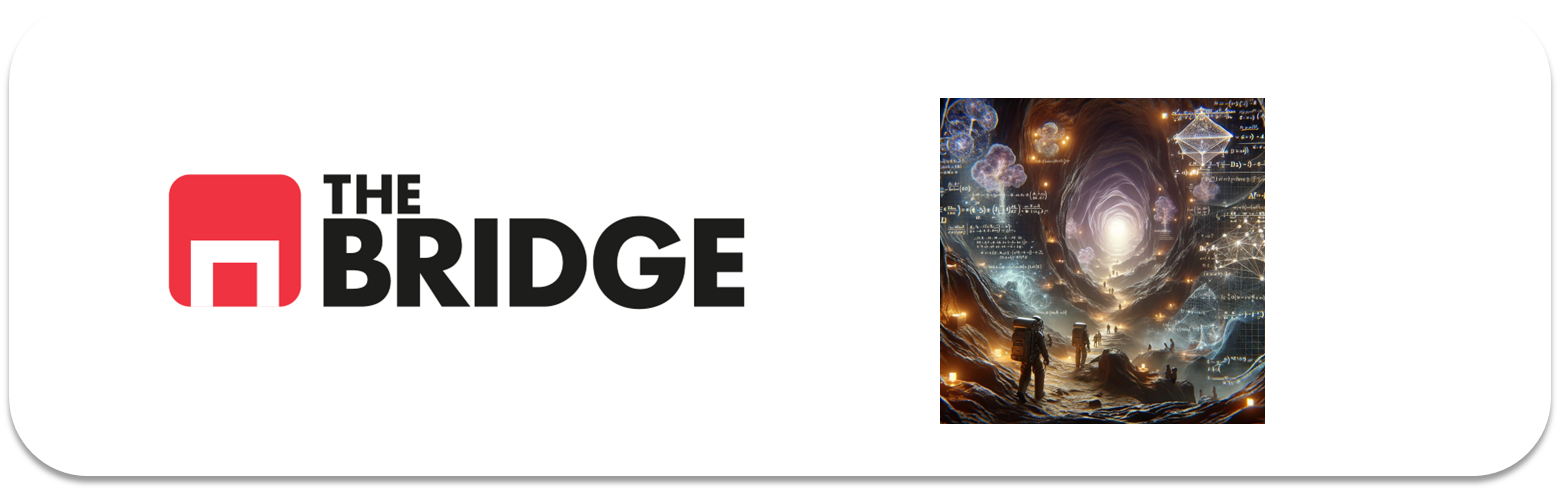

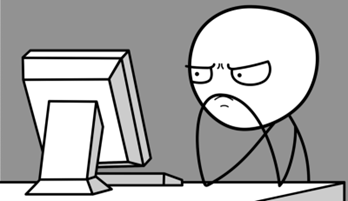

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [2]:
df =  pd.read_csv("./data/Autos_data.txt")

In [3]:
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
with open("./data/Autos_data.txt") as f:
    datos = f.read()

lista_datos = []

for linea in datos.split("\n"):
    #datos = {clave.lower():dato for clave,dato in zip(column_names,linea.split"\t")[0].(split() + [linea.split("\t")[-1].replace('"','')])}
    datos = {clave.lower():dato for clave,dato in zip(column_names,linea.split())}
    lista_datos.append(datos)

df = pd.DataFrame(lista_datos)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1
394,44.0,4,97.00,52.00,2130.,24.6,82,2
395,32.0,4,135.0,84.00,2295.,11.6,82,1
396,28.0,4,120.0,79.00,2625.,18.6,82,1


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [5]:
df["weight"] = df["weight"].str.replace(".","").astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           398 non-null    object
 1   cylinders     398 non-null    object
 2   displacement  398 non-null    object
 3   horsepower    398 non-null    object
 4   weight        398 non-null    int32 
 5   acceleration  398 non-null    object
 6   model year    398 non-null    object
 7   origin        398 non-null    object
dtypes: int32(1), object(7)
memory usage: 23.4+ KB


In [7]:
df = df.astype("float")

ValueError: could not convert string to float: '?'

In [8]:
for col in df.columns:
    df[col] = df[col].apply(lambda row: row if str(row) != "?" else np.nan).astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
dtypes: float64(8)
memory usage: 25.0 KB


In [10]:
df.dropna(inplace = True)

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [11]:
df["origin"] = df["origin"].map( {1.0: "USA", 2.0: "Europe", 3.0: "Japan"})

In [12]:
df = pd.get_dummies(df, columns = ["origin"], dtype = int)

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_USA
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0,0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,0,0,1
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,1,0,0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,0,0,1
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,0,0,1


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, train_size = 0.8, random_state = 42) # Cambiando el argumento para que te hagas un lío :-)

In [15]:
target = "mpg"

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

<Axes: xlabel='mpg', ylabel='Count'>

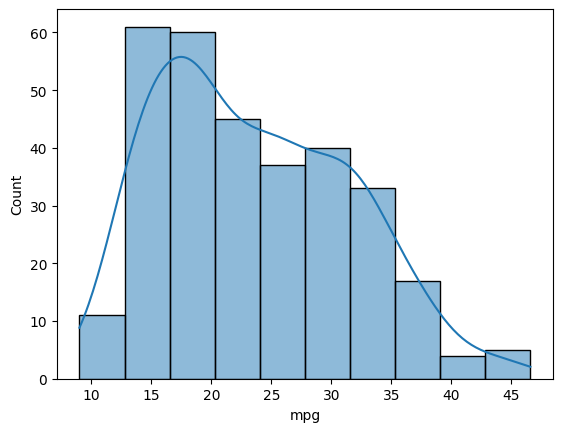

In [16]:
sns.histplot(data = train_set, x = target, kde = True)

In [17]:
features = [col for col in train_set.columns if col != target]
len(features)

9

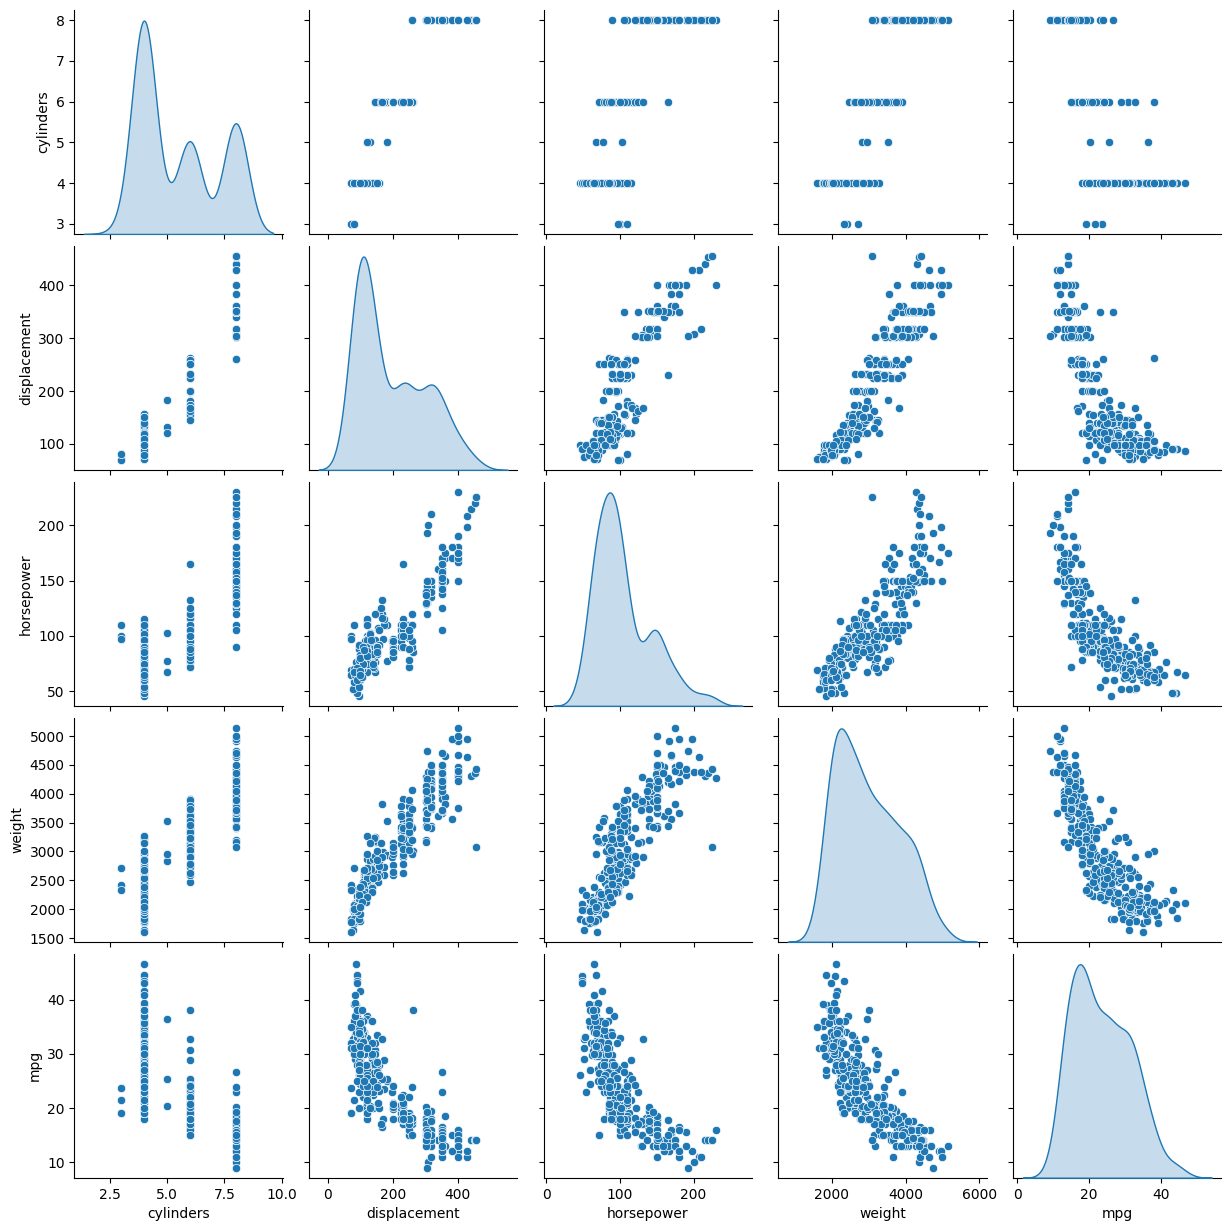

In [18]:
sns.pairplot(train_set[features[0:4]+[target]], diag_kind="kde");

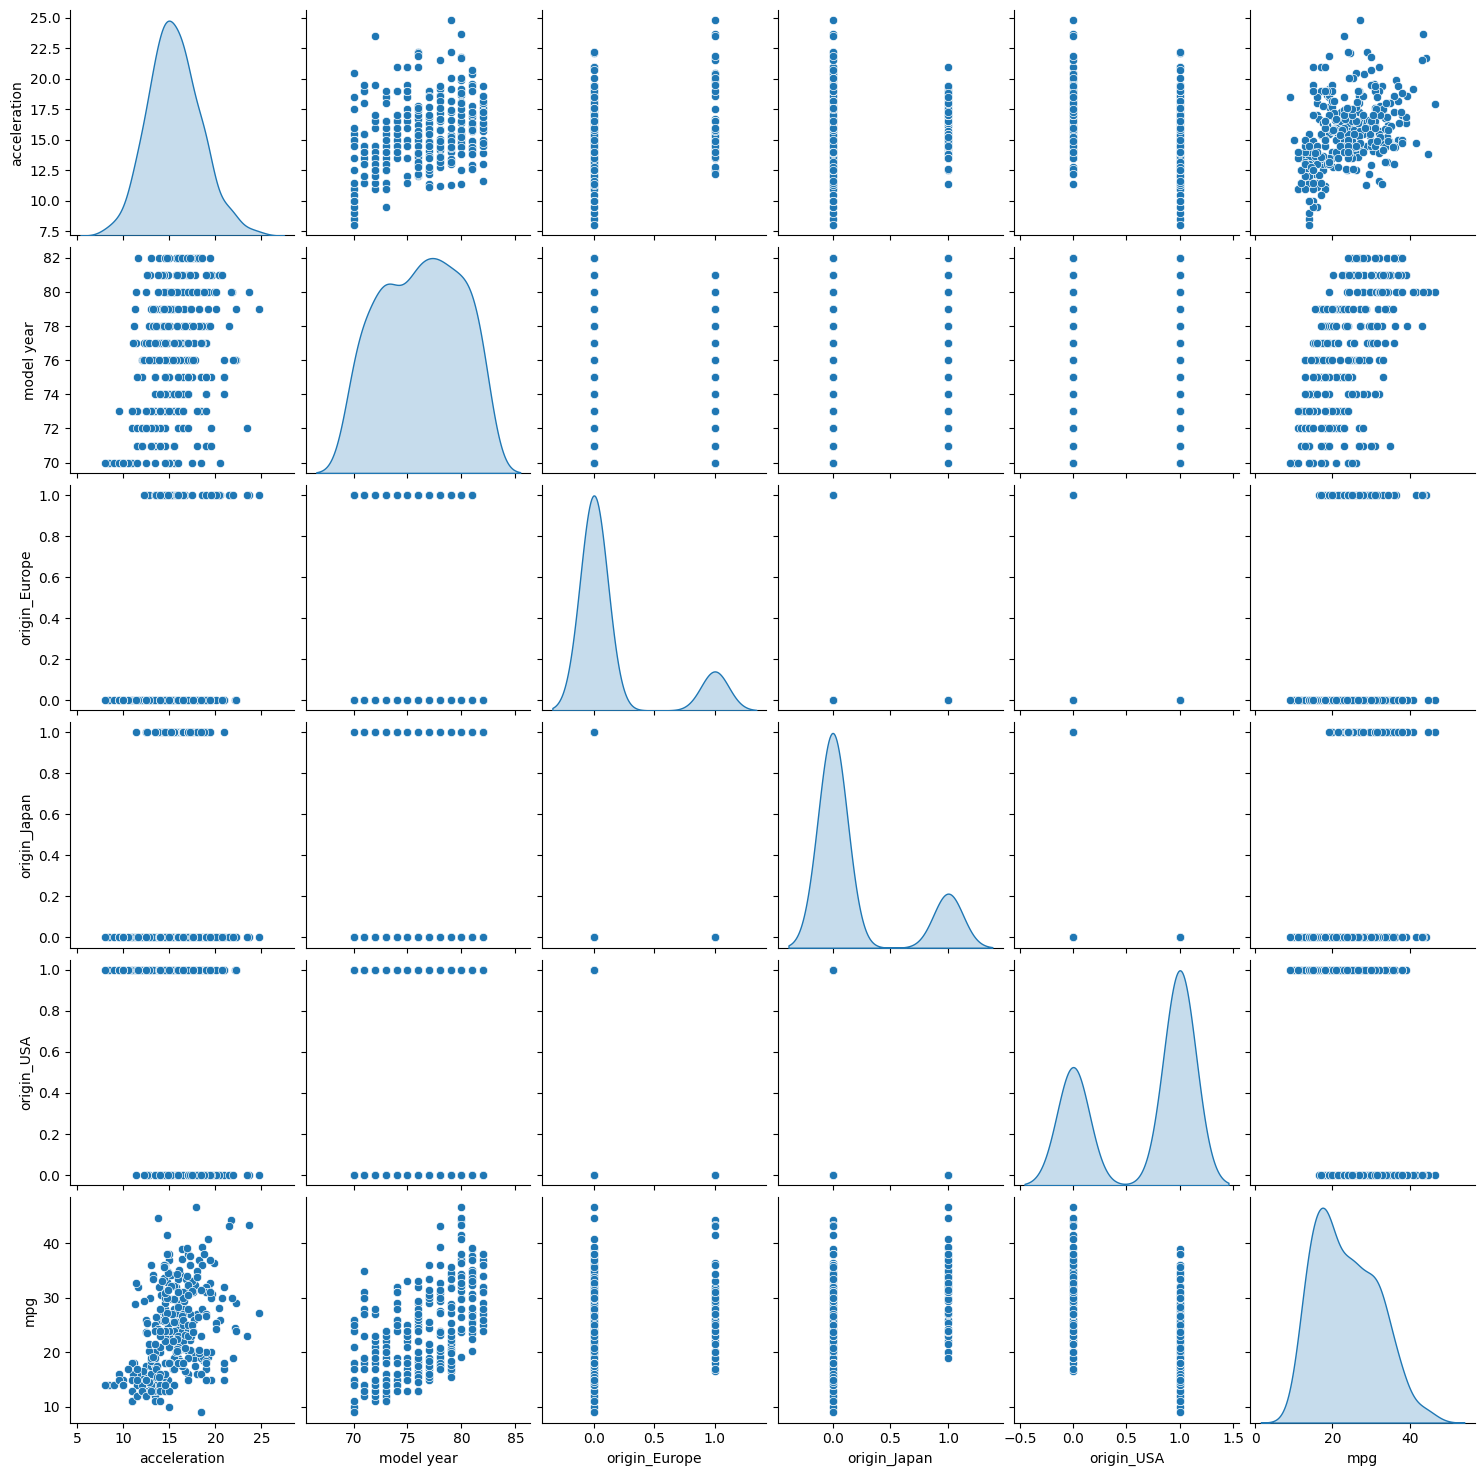

In [19]:
sns.pairplot(train_set[features[4:]+[target]], diag_kind="kde");

In [20]:
corr = train_set.corr()
np.abs(corr[target]).sort_values(ascending = False)


mpg              1.000000
weight           0.835568
displacement     0.811580
horsepower       0.782381
cylinders        0.780555
model year       0.590454
origin_USA       0.562162
origin_Japan     0.473004
acceleration     0.412048
origin_Europe    0.220038
Name: mpg, dtype: float64

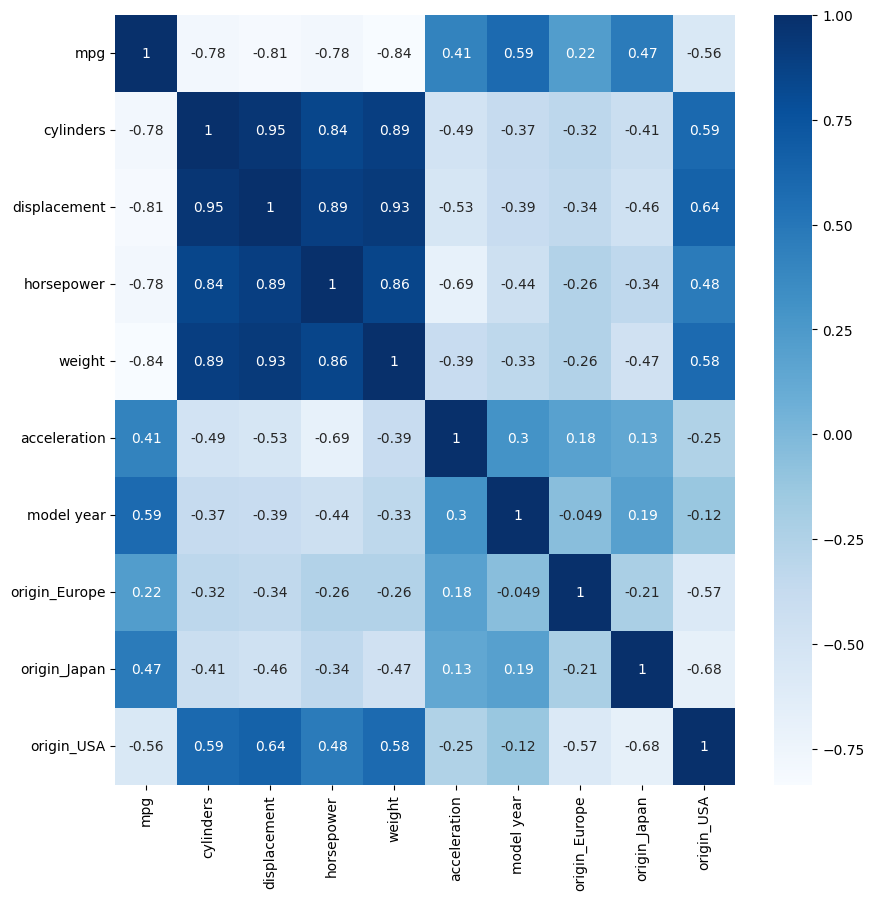

In [21]:
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues");

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set[features] = scaler.fit_transform(train_set[features])
test_set[features] = scaler.transform(test_set[features])

## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [23]:
factor_expansion = 3
num_units = len(features) * factor_expansion

*Método 1, como añadido de capas*

In [26]:
model_add = keras.models.Sequential()

model_add.add(keras.layers.Dense(units = num_units, activation='relu', input_shape = [len(features)]))
model_add.add(keras.layers.Dense(units = num_units, activation='relu'))
model_add.add(keras.layers.Dense(units = 1))


*Método 2, usando las capas en los argumentos de la inicialización*

In [24]:

model = keras.Sequential([
layers.Dense(num_units, activation='relu', input_shape=[len(features)]),
layers.Dense(num_units, activation='relu'),
layers.Dense(1)
])


model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [27]:
model_add.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 27)                270       
                                                                 
 dense_4 (Dense)             (None, 27)                756       
                                                                 
 dense_5 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1054 (4.12 KB)
Trainable params: 1054 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                270       
                                                                 
 dense_1 (Dense)             (None, 27)                756       
                                                                 
 dense_2 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1054 (4.12 KB)
Trainable params: 1054 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Tenemos 1054 parámetros que entrenar:*  
*1a capa: 27 unidades * (9 + 1) features de entrada más el bias = 270 pesos*  
*2a capa: 27 unidades * (27 + 1) salidas de la capa anterior más el bias = 756 pesos*  
*Capa de salida: 1 unidad * (27 + 1) salidas de la capa anterior más el bias = 28 pesos*

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [29]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

In [30]:
history = model.fit(X_train, 
                    y_train,
                    epochs=1000, 
                    validation_split=0.2,
                    verbose=0)

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,4.869935,1.527482,4.869935,5.962564,1.751093,5.962564,995
996,5.032755,1.568140,5.032755,6.150452,1.787822,6.150452,996
997,4.862278,1.536694,4.862278,6.189843,1.788595,6.189843,997
998,4.967248,1.549139,4.967248,6.048127,1.762567,6.048127,998
999,4.874075,1.537756,4.874075,6.331096,1.801463,6.331096,999


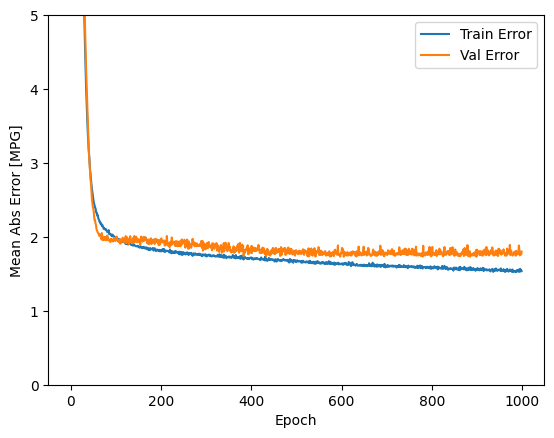

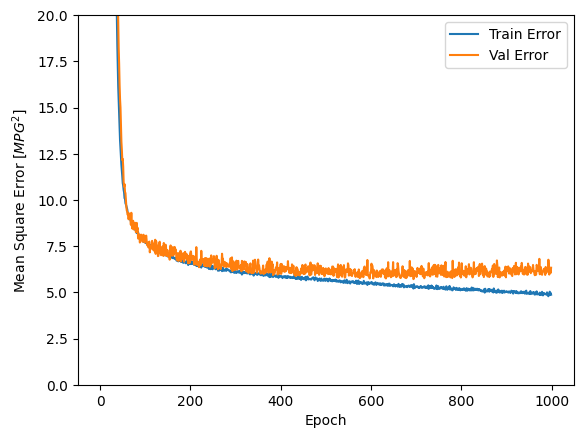

In [32]:
def plot_history(history, error = True):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  if error:
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

  else:
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
            label='Train loss')
    plt.plot(hist['epoch'], hist['val_loss'],
            label = 'Val loss')
    plt.legend()
    plt.show()



plot_history(history)

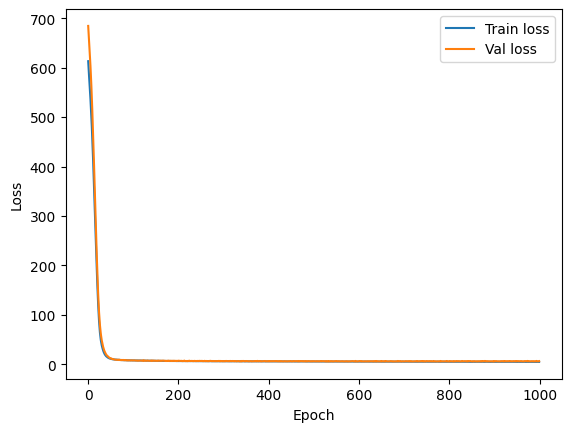

In [33]:
plot_history(history, False)

### Ejercicio 11

Comenta las gráficas anteriores.

*Estos gráficos muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas.
Actualicemos la llamada `model.fit` para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore.
Utilizaremos una * devolución de llamada de EarlyStopping * (un callback EarlyStopping) que pruebe una condición de entrenamiento para cada época.
Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.*

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

Epoch 1/1000
8/8 [==============================] - 0s 14ms/step - loss: 556.9842 - mae: 22.3500 - mse: 556.9842 - val_loss: 617.6078 - val_mae: 23.7088 - val_mse: 617.6078
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 528.4765 - mae: 21.7236 - mse: 528.4765 - val_loss: 591.8006 - val_mae: 23.1735 - val_mse: 591.8006
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 504.5502 - mae: 21.1813 - mse: 504.5502 - val_loss: 567.2721 - val_mae: 22.6518 - val_mse: 567.2721
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 479.7229 - mae: 20.6083 - mse: 479.7229 - val_loss: 540.2828 - val_mae: 22.0651 - val_mse: 540.2828
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 453.0006 - mae: 19.9751 - mse: 453.0006 - val_loss: 511.1605 - val_mae: 21.4146 - val_mse: 511.1605
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 424.6497 - mae: 19.2842 - mse: 424.6497 - val_loss: 480.4734 - val_

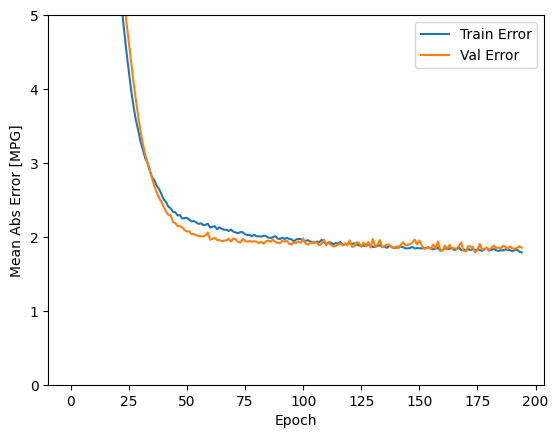

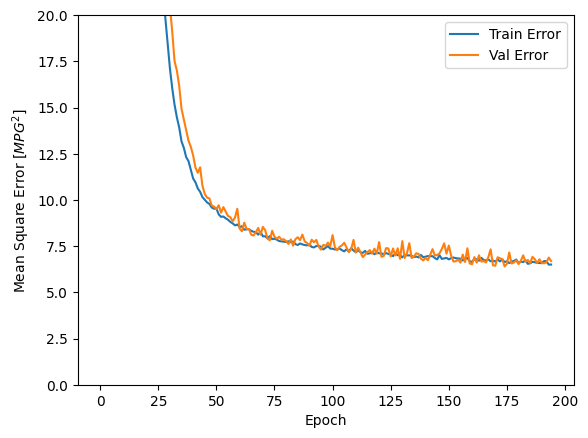

In [34]:
model = keras.Sequential([
layers.Dense(num_units, activation='relu', input_shape=[len(features)]),
layers.Dense(num_units, activation='relu'),
layers.Dense(1)
])


model.compile(loss='mse',
            optimizer=tf.keras.optimizers.RMSprop(0.001),
            metrics=['mae', 'mse'])


# The patience parameter is the amount of epochs to check for improvement
history = model.fit(X_train,
                    y_train, epochs=1000,
                    validation_split = 0.2,
                    verbose= 1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

plot_history(history)

Interpreta el gráfico

<Axes: >

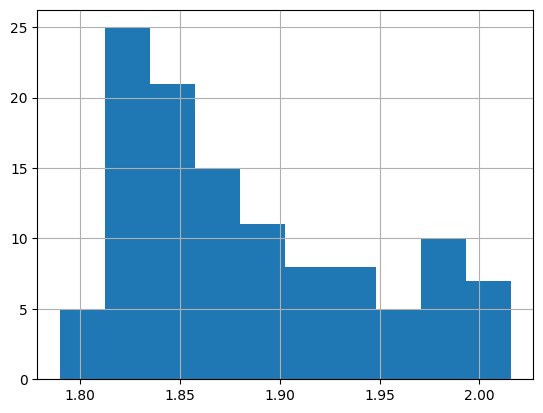

In [35]:
hist = pd.DataFrame(history.history)
hist[80:].mae.hist()

In [36]:
mae = hist[80:].mae.mean()
mae

1.8842396829439245

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [37]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=1)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 [==============================] - 0s 1ms/step - loss: 6.6211 - mae: 1.8648 - mse: 6.6211
Testing set Mean Abs Error:  1.86 MPG


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 [==============================] - 0s 997us/step


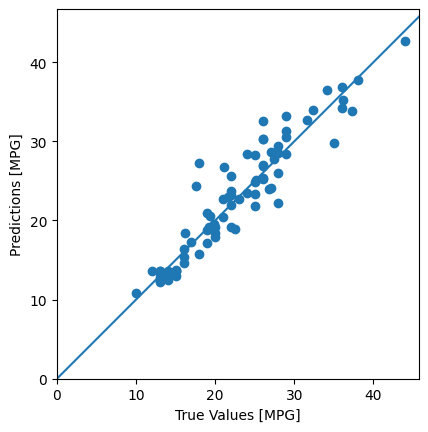

In [38]:
y_pred = model.predict(X_test).flatten() # Hay que aplanar porque devuelve un array de dos dimensiones

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


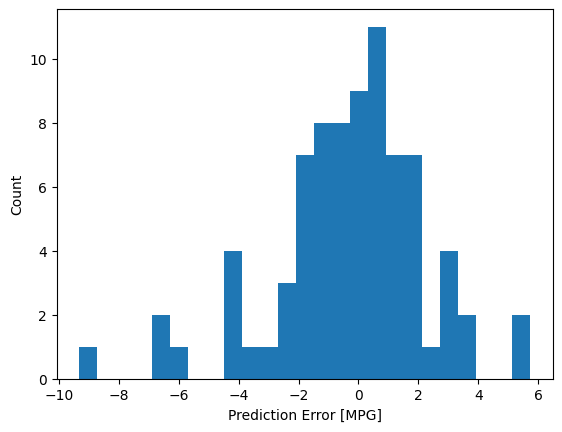

In [39]:
error = y_test - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")